In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
df = pd.read_csv('data/course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [8]:
views=df.query('action=="view"')
reading_times=views.groupby(['id','group'])['duration'].mean()
reading_times.head()

id      group     
183260  control       107.331484
183615  experiment     24.627594
184277  experiment    193.212489
184360  experiment    226.586283
184589  experiment     12.052097
Name: duration, dtype: float64

In [9]:
reading_times=reading_times.reset_index()
reading_times.head()

,id,group,duration
0,183260,control,107.331484
1,183615,experiment,24.627594
2,184277,experiment,193.212489
3,184360,experiment,226.586283
4,184589,experiment,12.052097


In [11]:
control_ctr=reading_times.query('group=="control"')['duration'].mean()
control_ctr

115.38637100678449

In [12]:
experiment_ctr=reading_times.query('group=="experiment"')['duration'].mean()
experiment_ctr

131.32084104717944

In [13]:
obs_diff=experiment_ctr-control_ctr
obs_diff

15.934470040394956

In [21]:
diffs=[]
for i in range(10000):
    boot_sample=views.sample(views.shape[0],replace=True)
    reading_times=boot_sample.groupby(['id','group'])['duration'].mean()
    reading_times=reading_times.reset_index()
    control_ctr=reading_times.query('group=="control"')['duration'].mean()
    experiment_ctr=reading_times.query('group=="experiment"')['duration'].mean()
    diffs.append(experiment_ctr-control_ctr)
diffs=np.array(diffs)

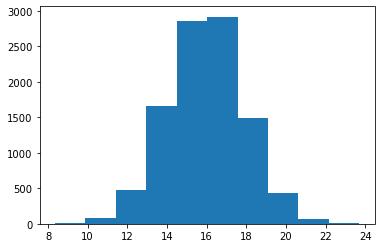

In [22]:
plt.hist(diffs);

In [23]:
null_vals=np.random.normal(0,diffs.std(),10000)

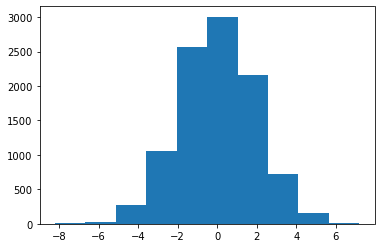

In [24]:
plt.hist(null_vals);

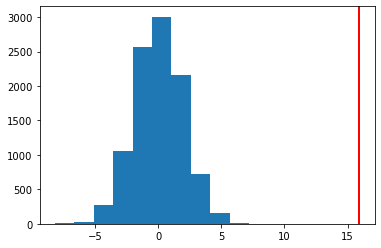

In [25]:
plt.hist(null_vals);
plt.axvline(obs_diff,color='r',linewidth=2);

In [26]:
p=(null_vals>obs_diff).mean()

In [27]:
p

0.0

In [28]:
p<0.05

True